# Loading data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [3]:
df = pd.read_csv('./control - improvement.csv')
df.head()

,Subgroup,Measure,Machine,Shift
0,1,1.460,1,1
1,1,1.448,1,1
2,2,1.490,1,1
3,2,1.444,1,1
4,3,1.446,1,1


# Normality test

In [4]:
# Perform the normality test for each machine -> machine 1 (1) and machine 2 (2)
machines = df['Machine'].unique()

for machine in machines:
    machine_data = df[df['Machine'] == machine]['Measure']
    stat, p_value = shapiro(machine_data)
    print(f"Machine {machine}: Shapiro-Wilk Test Statistic = {stat}, p-value = {p_value}")
    
    # Make a decision about the null hypothesis
    alpha = 0.05  # Significance level
    if p_value > alpha:
        print("Result: Accept the null hypothesis. The data comes from a normal distribution.")
    else:
        print("Result: Reject the null hypothesis. The data does not come from a normal distribution.")
    
    print("\n")

Machine 1: Shapiro-Wilk Test Statistic = 0.9563762545585632, p-value = 0.0720617026090622
Result: Accept the null hypothesis. The data comes from a normal distribution.


Machine 2: Shapiro-Wilk Test Statistic = 0.981231153011322, p-value = 0.6307073831558228
Result: Accept the null hypothesis. The data comes from a normal distribution.




#### Machine 1: Shapiro-Wilk Test Statistic = 0.9860713481903076, **p-value = 0.8335421085357666**
#### **Result: Accept the null hypothesis. The data comes from a normal distribution.**

#### ----------------------------------------

#### Machine 2: Shapiro-Wilk Test Statistic = 0.9783816933631897, **p-value = 0.5131714344024658**
#### **Result: Accept the null hypothesis. The data comes from a normal distribution.**

# Cp for each machine

In [5]:
# Calculate Cp for each machine
machines = df['Machine'].unique()

for machine in machines:
    machine_data = df[df['Machine'] == machine]['Measure']
    
    # Calculate process standard deviation
    process_std_dev = machine_data.std()
    
    # Define specification limits
    lower_spec_limit = 1.38
    upper_spec_limit = 1.52
    
    # Calculate Cp
    cp = (upper_spec_limit - lower_spec_limit) / (6 * process_std_dev)
    
    print(f"Machine {machine}: Cp = {cp}")

Machine 1: Cp = 1.0909292722478987
Machine 2: Cp = 1.2169440202456556


#### Machine 1: Cp = 1.0909292722478987
#### Machine 2: Cp = 1.2169440202456556

# Cpk for each machine

In [6]:
machines = df['Machine'].unique()

for machine in machines:
    machine_data = df[df['Machine'] == machine]['Measure']
    
    # Calculate process mean and standard deviation
    process_mean = machine_data.mean()
    process_std_dev = machine_data.std()
    
    # Define specification limits
    lower_spec_limit = 1.38
    upper_spec_limit = 1.52
    
    # Calculate Cpk
    cpk = min((upper_spec_limit - process_mean) / (3 * process_std_dev),
              (process_mean - lower_spec_limit) / (3 * process_std_dev))
    
    print(f"Machine {machine}: Cpk = {cpk}")

Machine 1: Cpk = 1.04449984191116
Machine 2: Cpk = 1.0633772748337016


#### Machine 1: Cpk = 1.04449984191116
#### Machine 2: Cpk = 1.0633772748337016


# Pp and Ppk -> Process capability status

In [7]:
# Calculate Pp and Ppk for each machine
machines = df['Machine'].unique()

for machine in machines:
    machine_data = df[df['Machine'] == machine]['Measure']
    
    # Calculate process mean and total standard deviation
    process_mean = machine_data.mean()
    process_std_dev_total = machine_data.std(ddof=0)
    
    # Define specification limits
    lower_spec_limit = 1.38
    upper_spec_limit = 1.52
    
    # Calculate Pp and Ppk
    pp = (upper_spec_limit - lower_spec_limit) / (6 * process_std_dev_total)
    ppk = min((upper_spec_limit - process_mean) / (3 * process_std_dev_total),
              (process_mean - lower_spec_limit) / (3 * process_std_dev_total))
    
    print(f"Machine {machine}: Pp = {pp}, Ppk = {ppk}")

        # Evaluate process capability
    if ppk >= 1:
        print("Process is capable.")
    else:
        print("Process is not capable.")
    
    print("\n")

Machine 1: Pp = 1.1024738188455208, Ppk = 1.0555530581029902
Process is capable.


Machine 2: Pp = 1.2298220933763497, Ppk = 1.0746302577836175
Process is capable.




#### Machine 1: Pp = 1.1024738188455208, Ppk = 1.0555530581029902
#### Process is capable.

#### ----------------------------------------------------------------

#### Machine 2: Pp = 1.2298220933763497, Ppk = 1.0746302577836175
#### Process is capable.

# Sigma Level

In [8]:
# Calculate Sigma level for each machine
machines = df['Machine'].unique()

for machine in machines:
    machine_data = df[df['Machine'] == machine]['Measure']
    
    # Calculate total process standard deviation
    process_std_dev_total = machine_data.std(ddof=0)
    
    # Define specification limits
    lower_spec_limit = 1.38
    upper_spec_limit = 1.52
    
    # Calculate Sigma level
    sigma_level = (upper_spec_limit - lower_spec_limit) / (6 * process_std_dev_total)
    
    print(f"Machine {machine}: Sigma Level = {sigma_level}")


Machine 1: Sigma Level = 1.1024738188455208
Machine 2: Sigma Level = 1.2298220933763497


#### Machine 1: Sigma Level = 1.1024738188455208
#### Machine 2: Sigma Level = 1.2298220933763497

# Box plot -> Machines

In [9]:
df.describe()

,Subgroup,Measure,Machine,Shift
count,96.000000,96.000000,96.000000,96.000000
mean,24.500000,1.455906,1.500000,1.500000
std,13.926121,0.020417,0.502625,0.502625
min,1.000000,1.412000,1.000000,1.000000
25%,12.750000,1.439750,1.000000,1.000000
50%,24.500000,1.456500,1.500000,1.500000
75%,36.250000,1.471000,2.000000,2.000000
max,48.000000,1.499000,2.000000,2.000000


/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

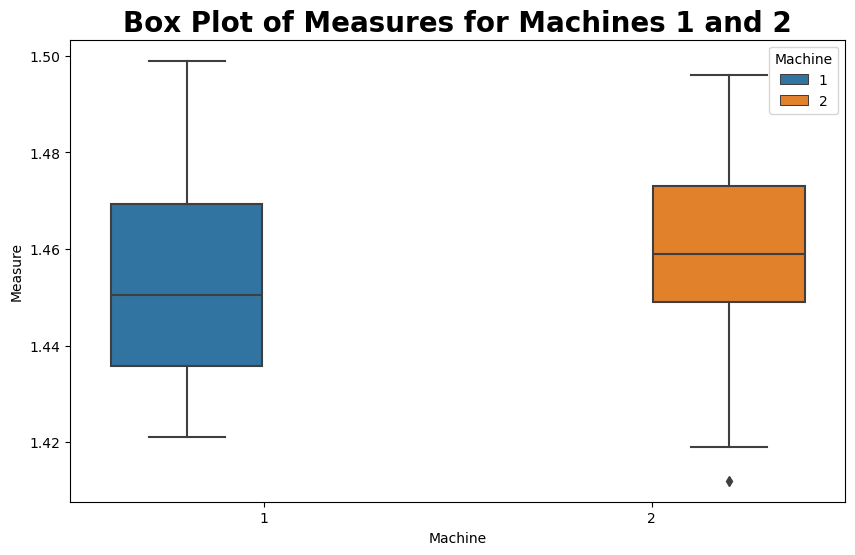

In [10]:
# Filter data for machines 1 and 2
machines_1_2 = df[df['Machine'].isin([1, 2])]

# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Machine', y='Measure', data=machines_1_2, hue="Machine")
plt.title('Box Plot of Measures for Machines 1 and 2', fontweight='bold', size=20)
plt.show()

## Box plot machine 1

count    48.000000
mean      1.452979
std       0.021388
min       1.421000
25%       1.435750
50%       1.450500
75%       1.469250
max       1.499000
Name: Measure, dtype: float64
IQR for Machine 1: 0.033500000000000085


/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


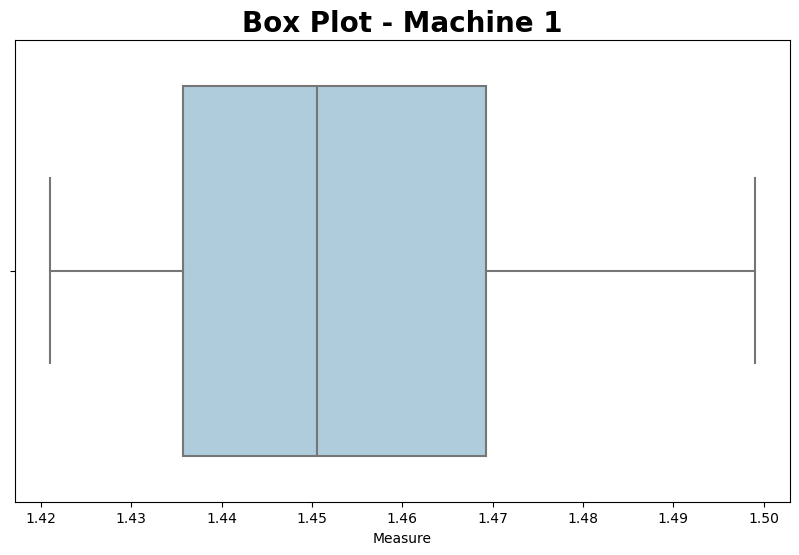

In [11]:
# Filter data for machine 1 only
machine_1_data = df[df['Machine'] == 1]

# Obtain descriptive statistics for machine 1
machine_1_describe = machine_1_data['Measure'].describe()
print(machine_1_describe)

# Calculate the interquartile range for machine 1
iqr_machine_1 = machine_1_describe['75%'] - machine_1_describe['25%']

print("IQR for Machine 1:", iqr_machine_1)

# Crear el box plot con Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Measure', data=machine_1_data, palette="Paired")
plt.title('Box Plot - Machine 1', fontweight='bold', size=20)
plt.show()

## Box plot - machine 2

count    48.000000
mean      1.458833
std       0.019174
min       1.412000
25%       1.449000
50%       1.459000
75%       1.473000
max       1.496000
Name: Measure, dtype: float64
IQR for Machine 1: 0.02400000000000002


/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


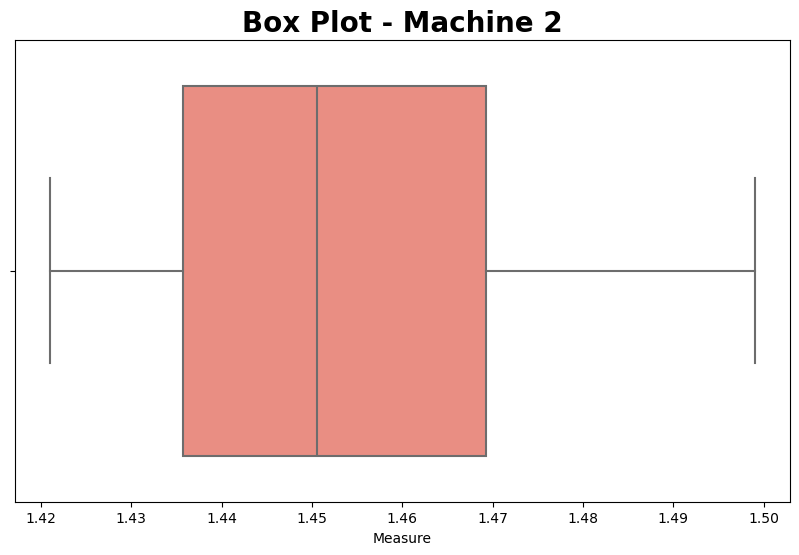

In [12]:
# Filter data for machine 1 only
machine_2_data = df[df['Machine'] == 2]

# Obtain descriptive statistics for machine 1
machine_2_describe = machine_2_data['Measure'].describe()
print(machine_2_describe)

# Calculate the interquartile range for machine 1
iqr_machine_2 = machine_2_describe['75%'] - machine_2_describe['25%']

print("IQR for Machine 1:", iqr_machine_2)

# Crear el box plot con Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Measure', data=machine_1_data, palette="dark:salmon_r")
plt.title('Box Plot - Machine 2', fontweight='bold', size=20)
plt.show()

# Box plot -> shifts

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

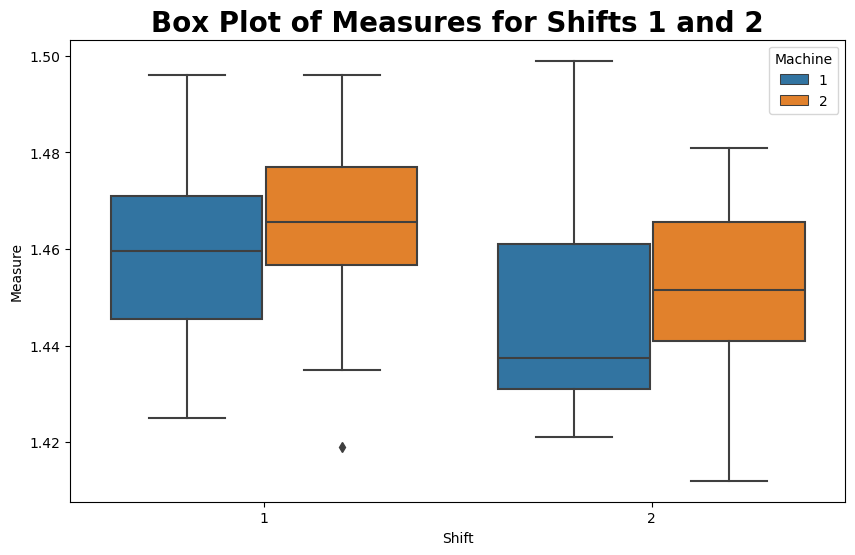

In [13]:
# Filter data for machines 1 and 2
shifts_1_2 = df[df['Shift'].isin([1, 2])]

# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Shift', y='Measure', data=shifts_1_2, hue="Machine")
plt.title('Box Plot of Measures for Shifts 1 and 2', fontweight='bold', size=20)
plt.show()

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


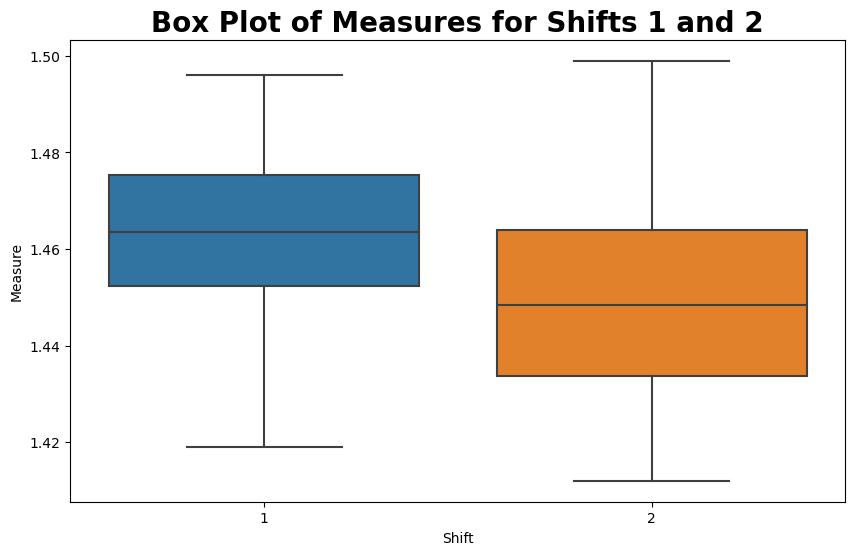

In [14]:
# Filter data for machines 1 and 2
shifts_1_2 = df[df['Shift'].isin([1, 2])]

# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Shift', y='Measure', data=shifts_1_2)
plt.title('Box Plot of Measures for Shifts 1 and 2', fontweight='bold', size=20)
plt.show()

## Shift 1

count    48.000000
mean      1.462583
std       0.018253
min       1.419000
25%       1.452250
50%       1.463500
75%       1.475250
max       1.496000
Name: Measure, dtype: float64
IQR for Shift 1: 0.02299999999999991


/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


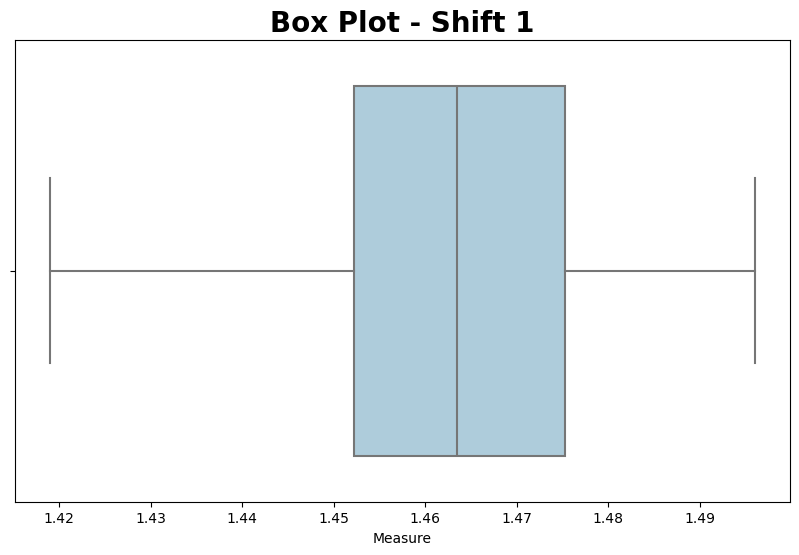

In [15]:
# Filter data for machine 1 only
shift_1_data = df[df['Shift'] == 1]

# Obtain descriptive statistics for machine 1
shift_1_describe = shift_1_data['Measure'].describe()
print(shift_1_describe)

# Calculate the interquartile range for shift 1
iqr_shift_1 = shift_1_describe['75%'] - shift_1_describe['25%']

print("IQR for Shift 1:", iqr_shift_1)

# Crear el box plot con Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Measure', data=shift_1_data, palette="Paired")
plt.title('Box Plot - Shift 1', fontweight='bold', size=20)
plt.show()

## Shift 2

count    48.000000
mean      1.449229
std       0.020454
min       1.412000
25%       1.433750
50%       1.448500
75%       1.464000
max       1.499000
Name: Measure, dtype: float64
IQR for Shift 2: 0.03025000000000011


/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


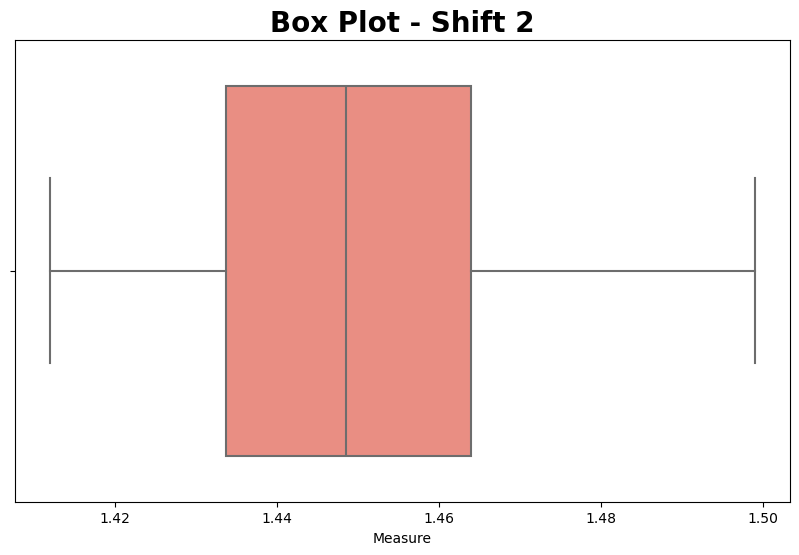

In [16]:
# Filter data for machine 1 only
shift_2_data = df[df['Shift'] == 2]

# Obtain descriptive statistics for machine 2
shift_2_describe = shift_2_data['Measure'].describe()
print(shift_2_describe)

# Calculate the interquartile range for shift 2
iqr_shift_2 = shift_2_describe['75%'] - shift_2_describe['25%']

print("IQR for Shift 2:", iqr_shift_2)

# Crear el box plot con Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Measure', data=shift_2_data, palette="dark:salmon_r")
plt.title('Box Plot - Shift 2', fontweight='bold', size=20)
plt.show()

# Control chart

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

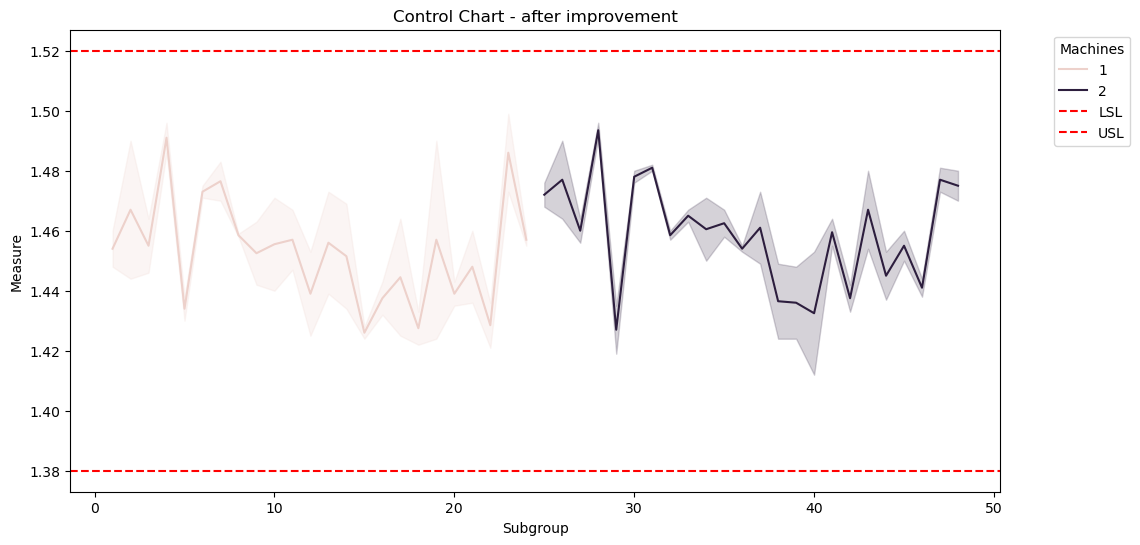

In [30]:
# Define control limits
LSL = 1.38
USL = 1.52

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Subgroup', y='Measure', hue='Machine', markers=True)

# Add control limits
plt.axhline(y=LSL, color='r', linestyle='--', label='LSL')
plt.axhline(y=USL, color='r', linestyle='--', label='USL')

plt.title('Control Chart - after improvement')
plt.xlabel('Subgroup')
plt.ylabel('Measure')
plt.legend(title='Machines', bbox_to_anchor=(1.05, 1), loc='upper left')

## Control chart for Machine 1

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

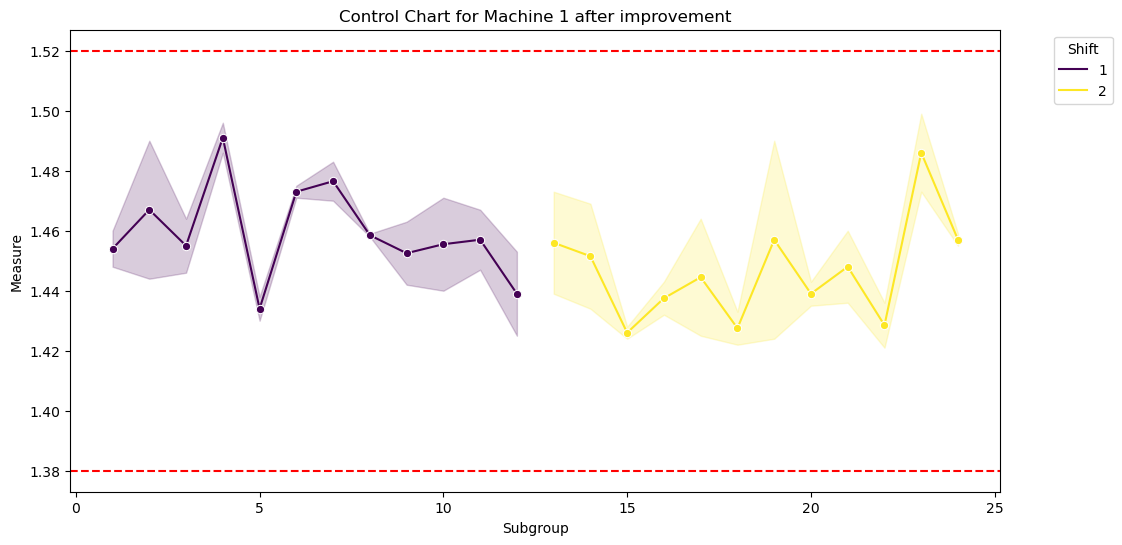

In [29]:

machine_1_data = df[df['Machine'] == 1]

# Define control limits
LSL = 1.38
USL = 1.52
plt.figure(figsize=(12, 6))
sns.lineplot(x='Subgroup', y='Measure', hue='Shift', data=machine_1_data, marker='o', palette='viridis')
plt.title('Control Chart for Machine 1 after improvement')
plt.xlabel('Subgroup')
plt.ylabel('Measure')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add control limits
plt.axhline(y=LSL, color='r', linestyle='--', label='LSL')
plt.axhline(y=USL, color='r', linestyle='--', label='USL')

plt.show()

## Control chart for Machine 2

/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniell/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

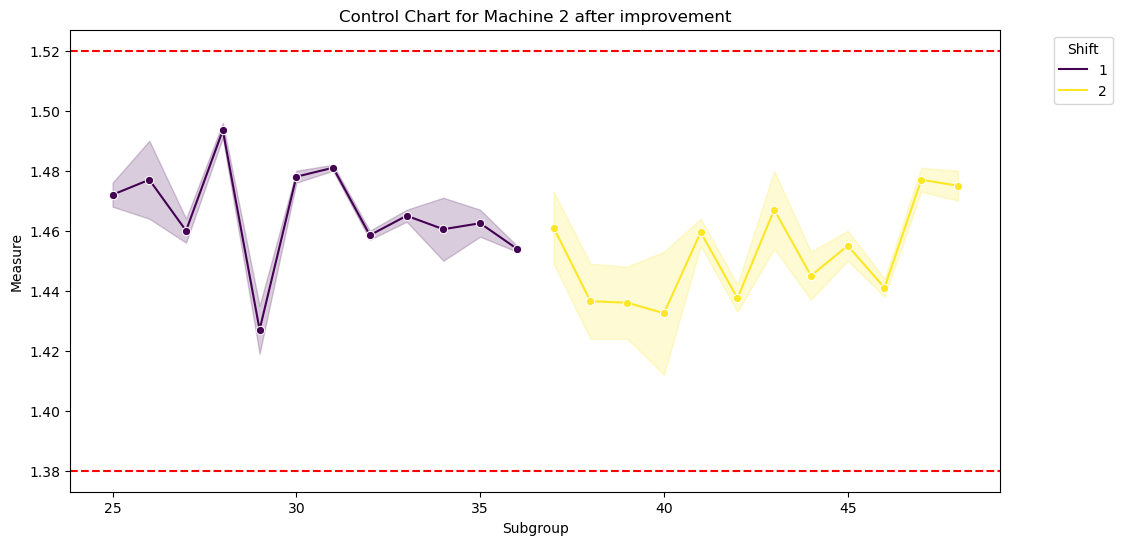

In [31]:
machine_1_data = df[df['Machine'] == 2]

# Define control limits
LSL = 1.38
USL = 1.52
plt.figure(figsize=(12, 6))
sns.lineplot(x='Subgroup', y='Measure', hue='Shift', data=machine_1_data, marker='o', palette='viridis')
plt.title('Control Chart for Machine 2 after improvement')
plt.xlabel('Subgroup')
plt.ylabel('Measure')
plt.legend(title='Shift', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add control limits
plt.axhline(y=LSL, color='r', linestyle='--', label='LSL')
plt.axhline(y=USL, color='r', linestyle='--', label='USL')

plt.show()

# Validating if the process is controlled

In [22]:
# Define control limits
LIE = 1.38
LSE = 1.52

# Evaluate whether the process of each machine is under control.
for machine, group in df.groupby('Machine'):
    measurements = group['Measure']
    if all(LIE <= measurement <= LSE for measurement in measurements):
        print(f"The {machine} process is under control.")
    else:
        print(f"The {machine} process is not under control.")

The 1 process is under control.
The 2 process is under control.
